# DA_HW_3 Support Vector Machine and Decision Trees

# Due on 5/10 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel without specifying the C-parameter

Type your answer and code here

In [4]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1),
                                                    df['had_affair'], test_size=0.20,
                                                    random_state=101)
model_1 = svm.SVC(kernel='linear')
model_1.fit(x_train, y_train)
predictions = model_1.predict(x_test)
print(classification_report(y_test, predictions))
print()
print('Accuracy Score:', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274


Accuracy Score: 0.707221350078493


### Question 2. Now try different value of C-parameter and rerun your model

Type your answer and code here

In [5]:
model_2 = svm.SVC(kernel='linear', C=2**-5)
model_2.fit(x_train, y_train)
predictions = model_2.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       850
           1       0.64      0.25      0.36       424

    accuracy                           0.70      1274
   macro avg       0.68      0.59      0.59      1274
weighted avg       0.69      0.70      0.66      1274

0.7048665620094191


In [6]:
model_3 = svm.SVC(kernel='linear', C=2**5)
model_3.fit(x_train, y_train)
predictions = model_3.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.66      1274

0.7056514913657771


### Question 3. Now use rbf as your kernel along with different value for Gamma and C

Type your answer and code here

In [7]:
model_4 = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model_4.fit(x_train, y_train)
predictions = model_4.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       850
           1       0.64      0.31      0.42       424

    accuracy                           0.71      1274
   macro avg       0.68      0.61      0.61      1274
weighted avg       0.70      0.71      0.68      1274

0.7111459968602826


In [8]:
model_5 = svm.SVC(kernel='rbf', C=2**-5, gamma=1)
model_5.fit(x_train, y_train)
predictions = model_5.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       850
           1       0.00      0.00      0.00       424

    accuracy                           0.67      1274
   macro avg       0.33      0.50      0.40      1274
weighted avg       0.45      0.67      0.53      1274

0.6671899529042387


In [9]:
model_6 = svm.SVC(kernel='rbf', C=2**-5, gamma=2**-5)
model_6.fit(x_train, y_train)
predictions = model_6.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       850
           1       0.00      0.00      0.00       424

    accuracy                           0.67      1274
   macro avg       0.33      0.50      0.40      1274
weighted avg       0.45      0.67      0.53      1274

0.6671899529042387


In [10]:
model_7 = svm.SVC(kernel='rbf', C=2**5, gamma=2**-5)
model_7.fit(x_train, y_train)
predictions = model_7.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
y=accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6923076923076923


In [11]:
model_8 = svm.SVC(kernel='rbf', C=2**5, gamma=2**5)
model_8.fit(x_train, y_train)
predictions = model_8.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       850
           1       0.41      0.15      0.22       424

    accuracy                           0.65      1274
   macro avg       0.54      0.52      0.50      1274
weighted avg       0.59      0.65      0.59      1274

0.6452119309262166


In [12]:
model_9 = svm.SVC(kernel='rbf', C=2**5, gamma=1)
model_9.fit(x_train, y_train)
predictions = model_9.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       850
           1       0.47      0.33      0.39       424

    accuracy                           0.65      1274
   macro avg       0.59      0.57      0.57      1274
weighted avg       0.63      0.65      0.64      1274

0.6530612244897959


In [13]:
model_10 = svm.SVC(kernel='rbf', C=2, gamma=1)
model_10.fit(x_train, y_train)
predictions = model_10.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       850
           1       0.47      0.32      0.38       424

    accuracy                           0.65      1274
   macro avg       0.59      0.57      0.57      1274
weighted avg       0.63      0.65      0.63      1274

0.6546310832025117


In [14]:
model_11 = svm.SVC(kernel='rbf', C=2, gamma=2)
model_11.fit(x_train, y_train)
predictions = model_11.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       850
           1       0.42      0.19      0.26       424

    accuracy                           0.64      1274
   macro avg       0.55      0.53      0.51      1274
weighted avg       0.59      0.64      0.60      1274

0.6420722135007849


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters? Comment on the effect of using different C and Gamma parameters

Base on the accuracy score which given by the modle, the best choice is:
<br>model_4 = svm.SVC(kernel='rbf', C=1, gamma=2**-5) which is using RBF kernel, value of C is 1 and value of gamma is 2^-5. And accuracy score is 0.7111459968602826
<br>
<br>Different in C:
1. Low C
- In SVM, using a low value of C will prioritize simplicity which having a soft margin. 
- It will have less complicated model, high bias, low variance, may underfit
2. High C
- In SVM, using a high value of C will prioritize making few mistakes which having a hard margin.
- It will have more complicated model, low bias, high variance, may overfit

Compare the model_6 and model_7, both model has the same low gamma parameter and using RBF kernel, model_6 has low C compare model_7 which has high C. 
- The accuracy score for model_6 is lower then model_7 by about 0.025. 
- The average f1-score for case 1 of model_6 is lower then model_7 by about 0.43. 

<br>Compare the model_2 and model_3, both model using linear kernel, model_2 has low C compare model_3 which has high C. 
- The accuracy score for model_2 is lower then model_3 by about 0.00078. 
- The average f1-score for case 1 of model_2 is lower then model_3 by about 0.02.

Therefor, using High C is better for this set of data. 

Different in Gamma:
1. Low Gamma will have less complicated model, and may underfit
2. High Gamma will have more complicated model, and may overfit

Compare the model_7, model_8 and model_9, all three model has the same high C parameter and using RBF kernel. Gamma for model_7 is 2^-5 which is low Gamma. Gamma for model_8 is 2^5 which is high Gamma. And Gamma for model_9 is 1 which is between model_7 and model_8. 
1. The accuracy score for all three model in decresing order is  
- model_7 which is 0.6923076923076923
- model_9 which is 0.6530612244897959
- model_8 which is 0.6452119309262166

1. The average f1-score for case 1 of all three model in decresing order is  
- model_7 which is 0.43
- model_9 which is 0.39 
- model_8 which is 0.22

Therefor, using low Gamma is better for this set of data while using high C parameter. 

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

Type your code here

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       850
           1       0.44      0.38      0.41       424

    accuracy                           0.63      1274
   macro avg       0.58      0.57      0.57      1274
weighted avg       0.62      0.63      0.63      1274

0.6334379905808477


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

Type your answer and code here

In [16]:
model = DecisionTreeClassifier(max_depth=2, criterion='gini')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [17]:
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [18]:
model = DecisionTreeClassifier(max_depth=3, criterion='gini')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344


In [19]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344


In [20]:
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.67      1274

0.7025117739403454


In [21]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.67      1274

0.7025117739403454


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

**The choice of the criterion not important in this case**. By choosing either entropy or gini gives the same accuracy score.

By choosing the three different max_depth, there is not much of different between the accuracy score and the average f1-score for case 1 of all three model. Therefore, **the different between the max_depth is not important in this case**. 

The best choice of max_depth and criterion is max_depth=2 and criterion='entropy' or 'gini' 

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

Type your answer and code here

In [22]:
from sklearn import tree
from matplotlib.pyplot import figure

model1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model1.fit(x_train, y_train)
model2 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model2.fit(x_train, y_train)
model3 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(2325.0, 2831.25, 'X[0] <= 3.5\nentropy = 0.904\nsamples = 5092\nvalue = [3463, 1629]'),
 Text(1162.5, 1698.75, 'X[2] <= 4.25\nentropy = 0.974\nsamples = 1138\nvalue = [462, 676]'),
 Text(581.25, 566.25, 'entropy = 0.998\nsamples = 304\nvalue = [160, 144]'),
 Text(1743.75, 566.25, 'entropy = 0.944\nsamples = 834\nvalue = [302, 532]'),
 Text(3487.5, 1698.75, 'X[2] <= 4.25\nentropy = 0.797\nsamples = 3954\nvalue = [3001, 953]'),
 Text(2906.25, 566.25, 'entropy = 0.571\nsamples = 1636\nvalue = [1415, 221]'),
 Text(4068.75, 566.25, 'entropy = 0.9\nsamples = 2318\nvalue = [1586, 732]')]

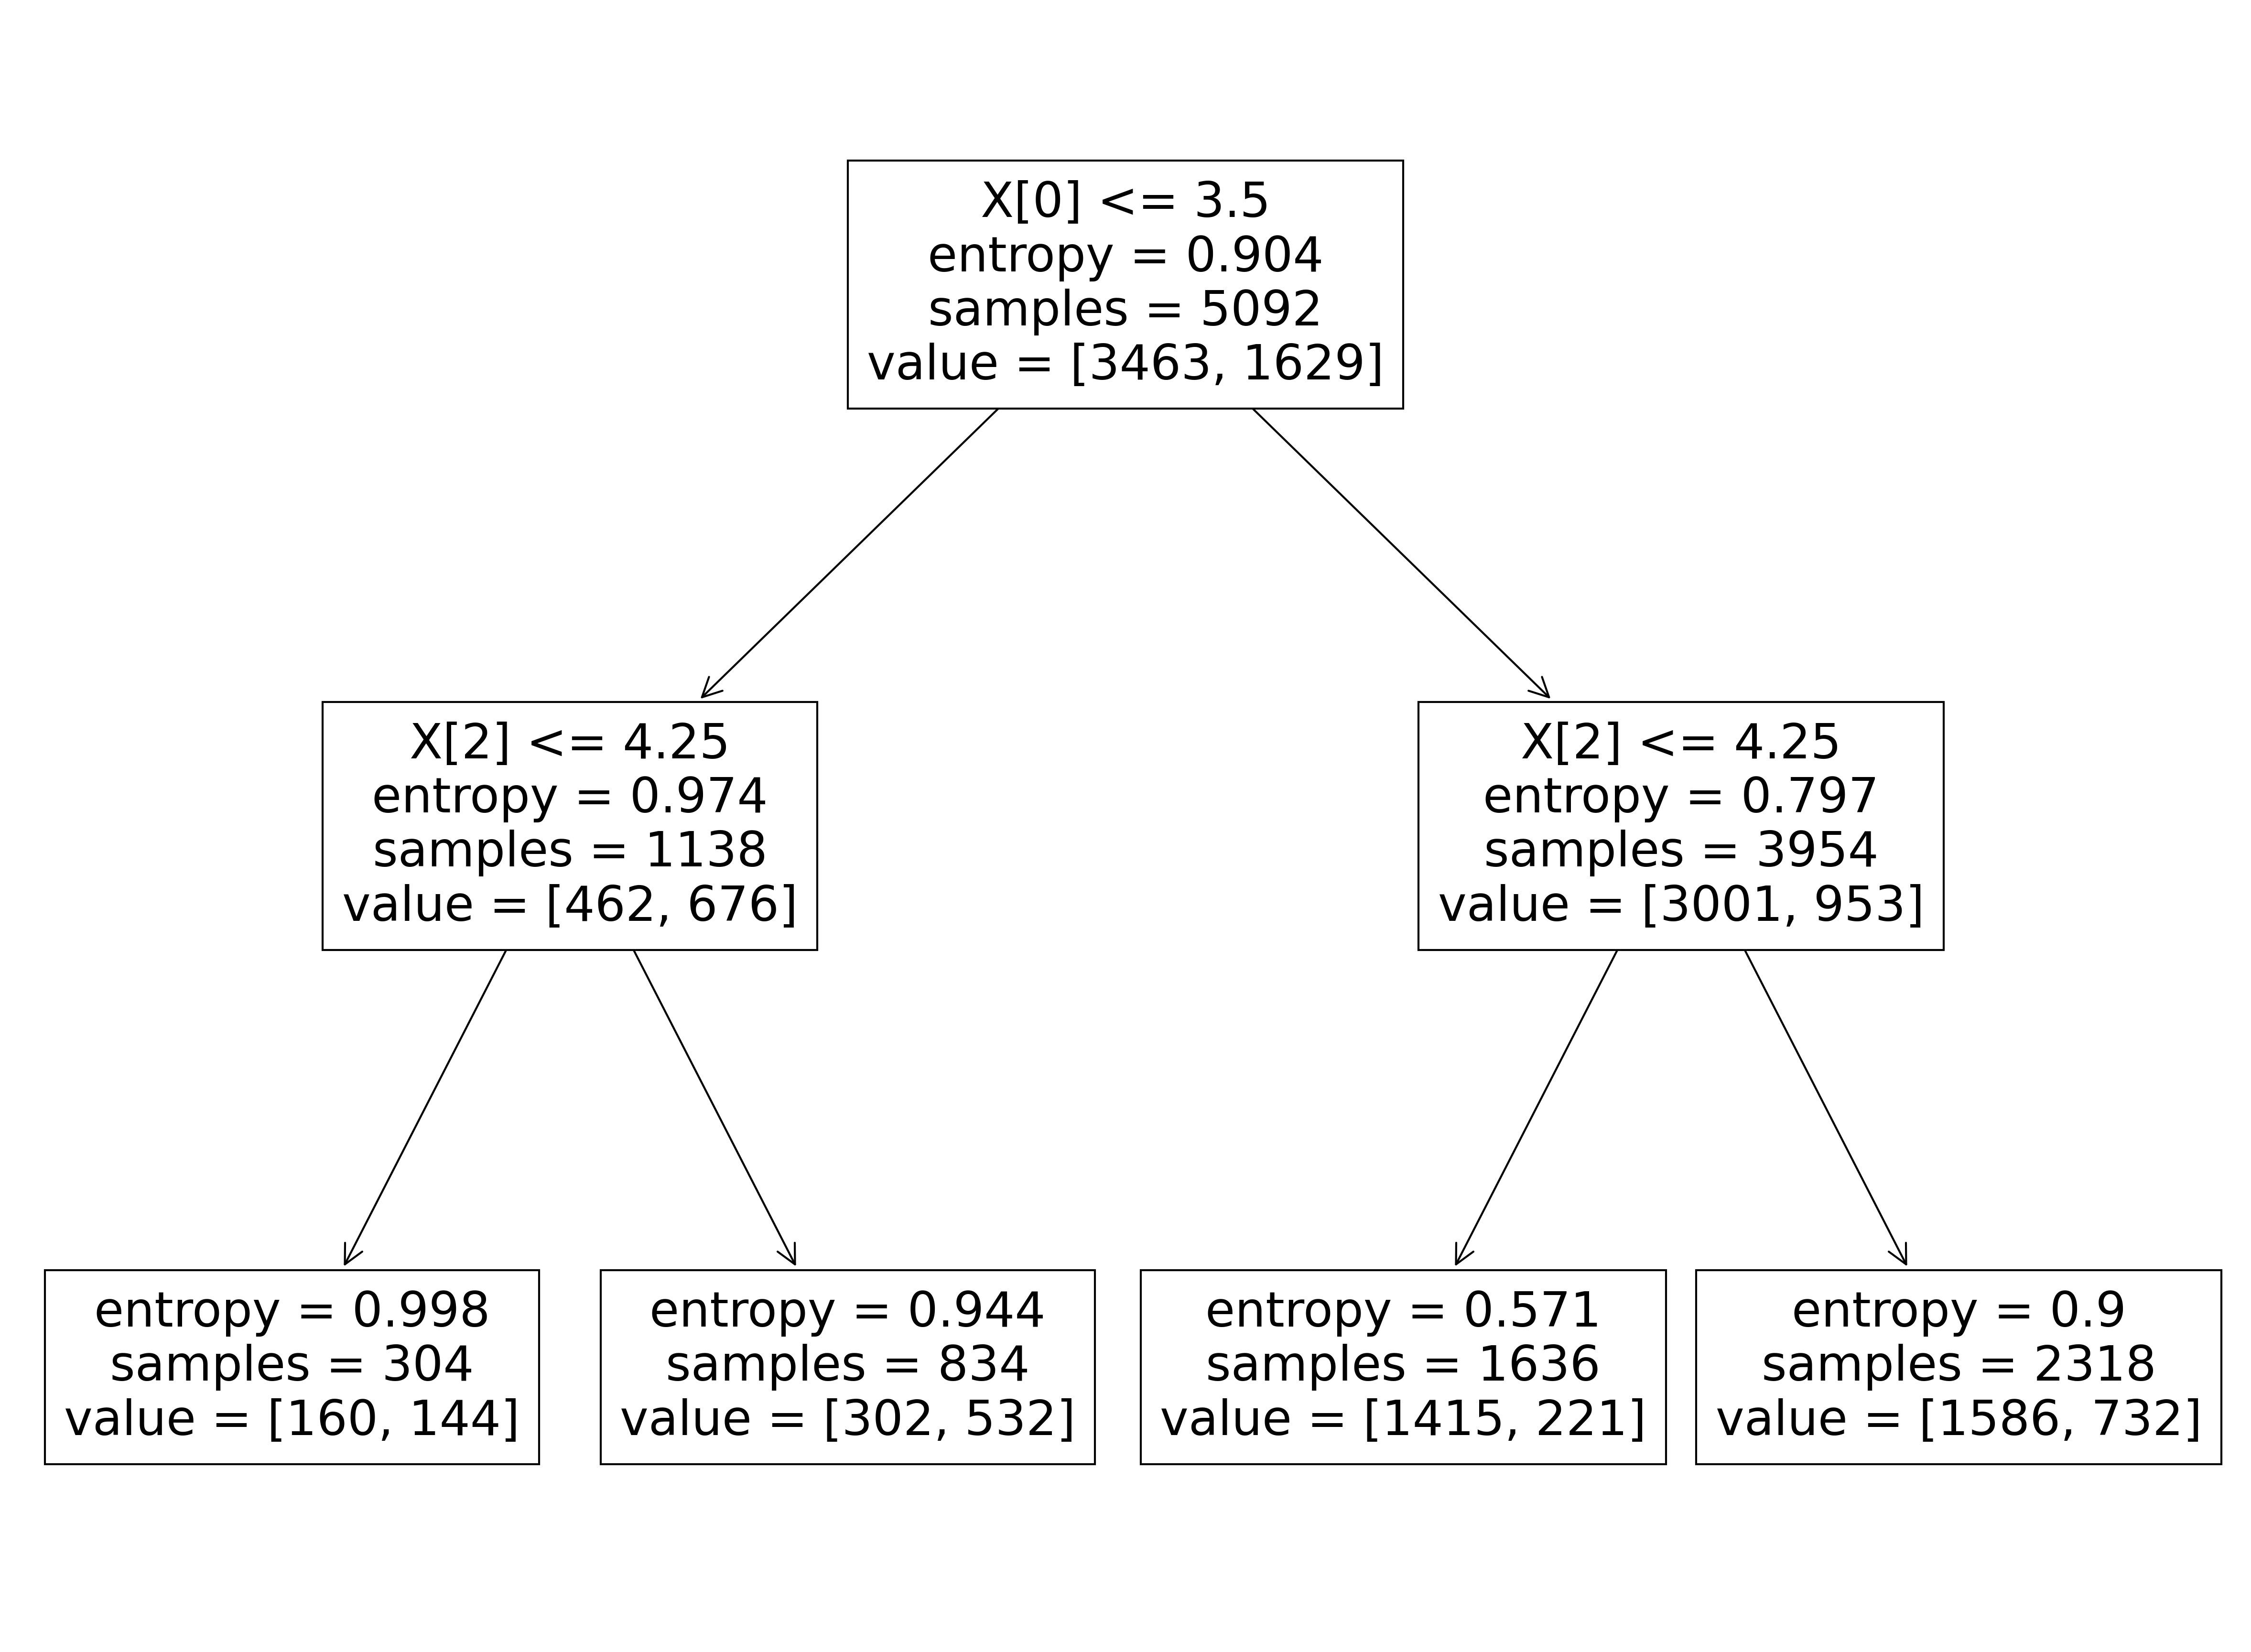

In [23]:
figure(figsize=(20, 15), dpi=300)
tree.plot_tree(model1)

[Text(2325.0, 2972.8125, 'X[0] <= 3.5\nentropy = 0.904\nsamples = 5092\nvalue = [3463, 1629]'),
 Text(1162.5, 2123.4375, 'X[2] <= 4.25\nentropy = 0.974\nsamples = 1138\nvalue = [462, 676]'),
 Text(581.25, 1274.0625, 'X[2] <= 1.5\nentropy = 0.998\nsamples = 304\nvalue = [160, 144]'),
 Text(290.625, 424.6875, 'entropy = 0.544\nsamples = 24\nvalue = [21, 3]'),
 Text(871.875, 424.6875, 'entropy = 1.0\nsamples = 280\nvalue = [139, 141]'),
 Text(1743.75, 1274.0625, 'X[6] <= 0.5\nentropy = 0.944\nsamples = 834\nvalue = [302, 532]'),
 Text(1453.125, 424.6875, 'entropy = 0.922\nsamples = 706\nvalue = [238, 468]'),
 Text(2034.375, 424.6875, 'entropy = 1.0\nsamples = 128\nvalue = [64, 64]'),
 Text(3487.5, 2123.4375, 'X[2] <= 4.25\nentropy = 0.797\nsamples = 3954\nvalue = [3001, 953]'),
 Text(2906.25, 1274.0625, 'X[2] <= 1.5\nentropy = 0.571\nsamples = 1636\nvalue = [1415, 221]'),
 Text(2615.625, 424.6875, 'entropy = 0.199\nsamples = 259\nvalue = [251, 8]'),
 Text(3196.875, 424.6875, 'entropy = 0.

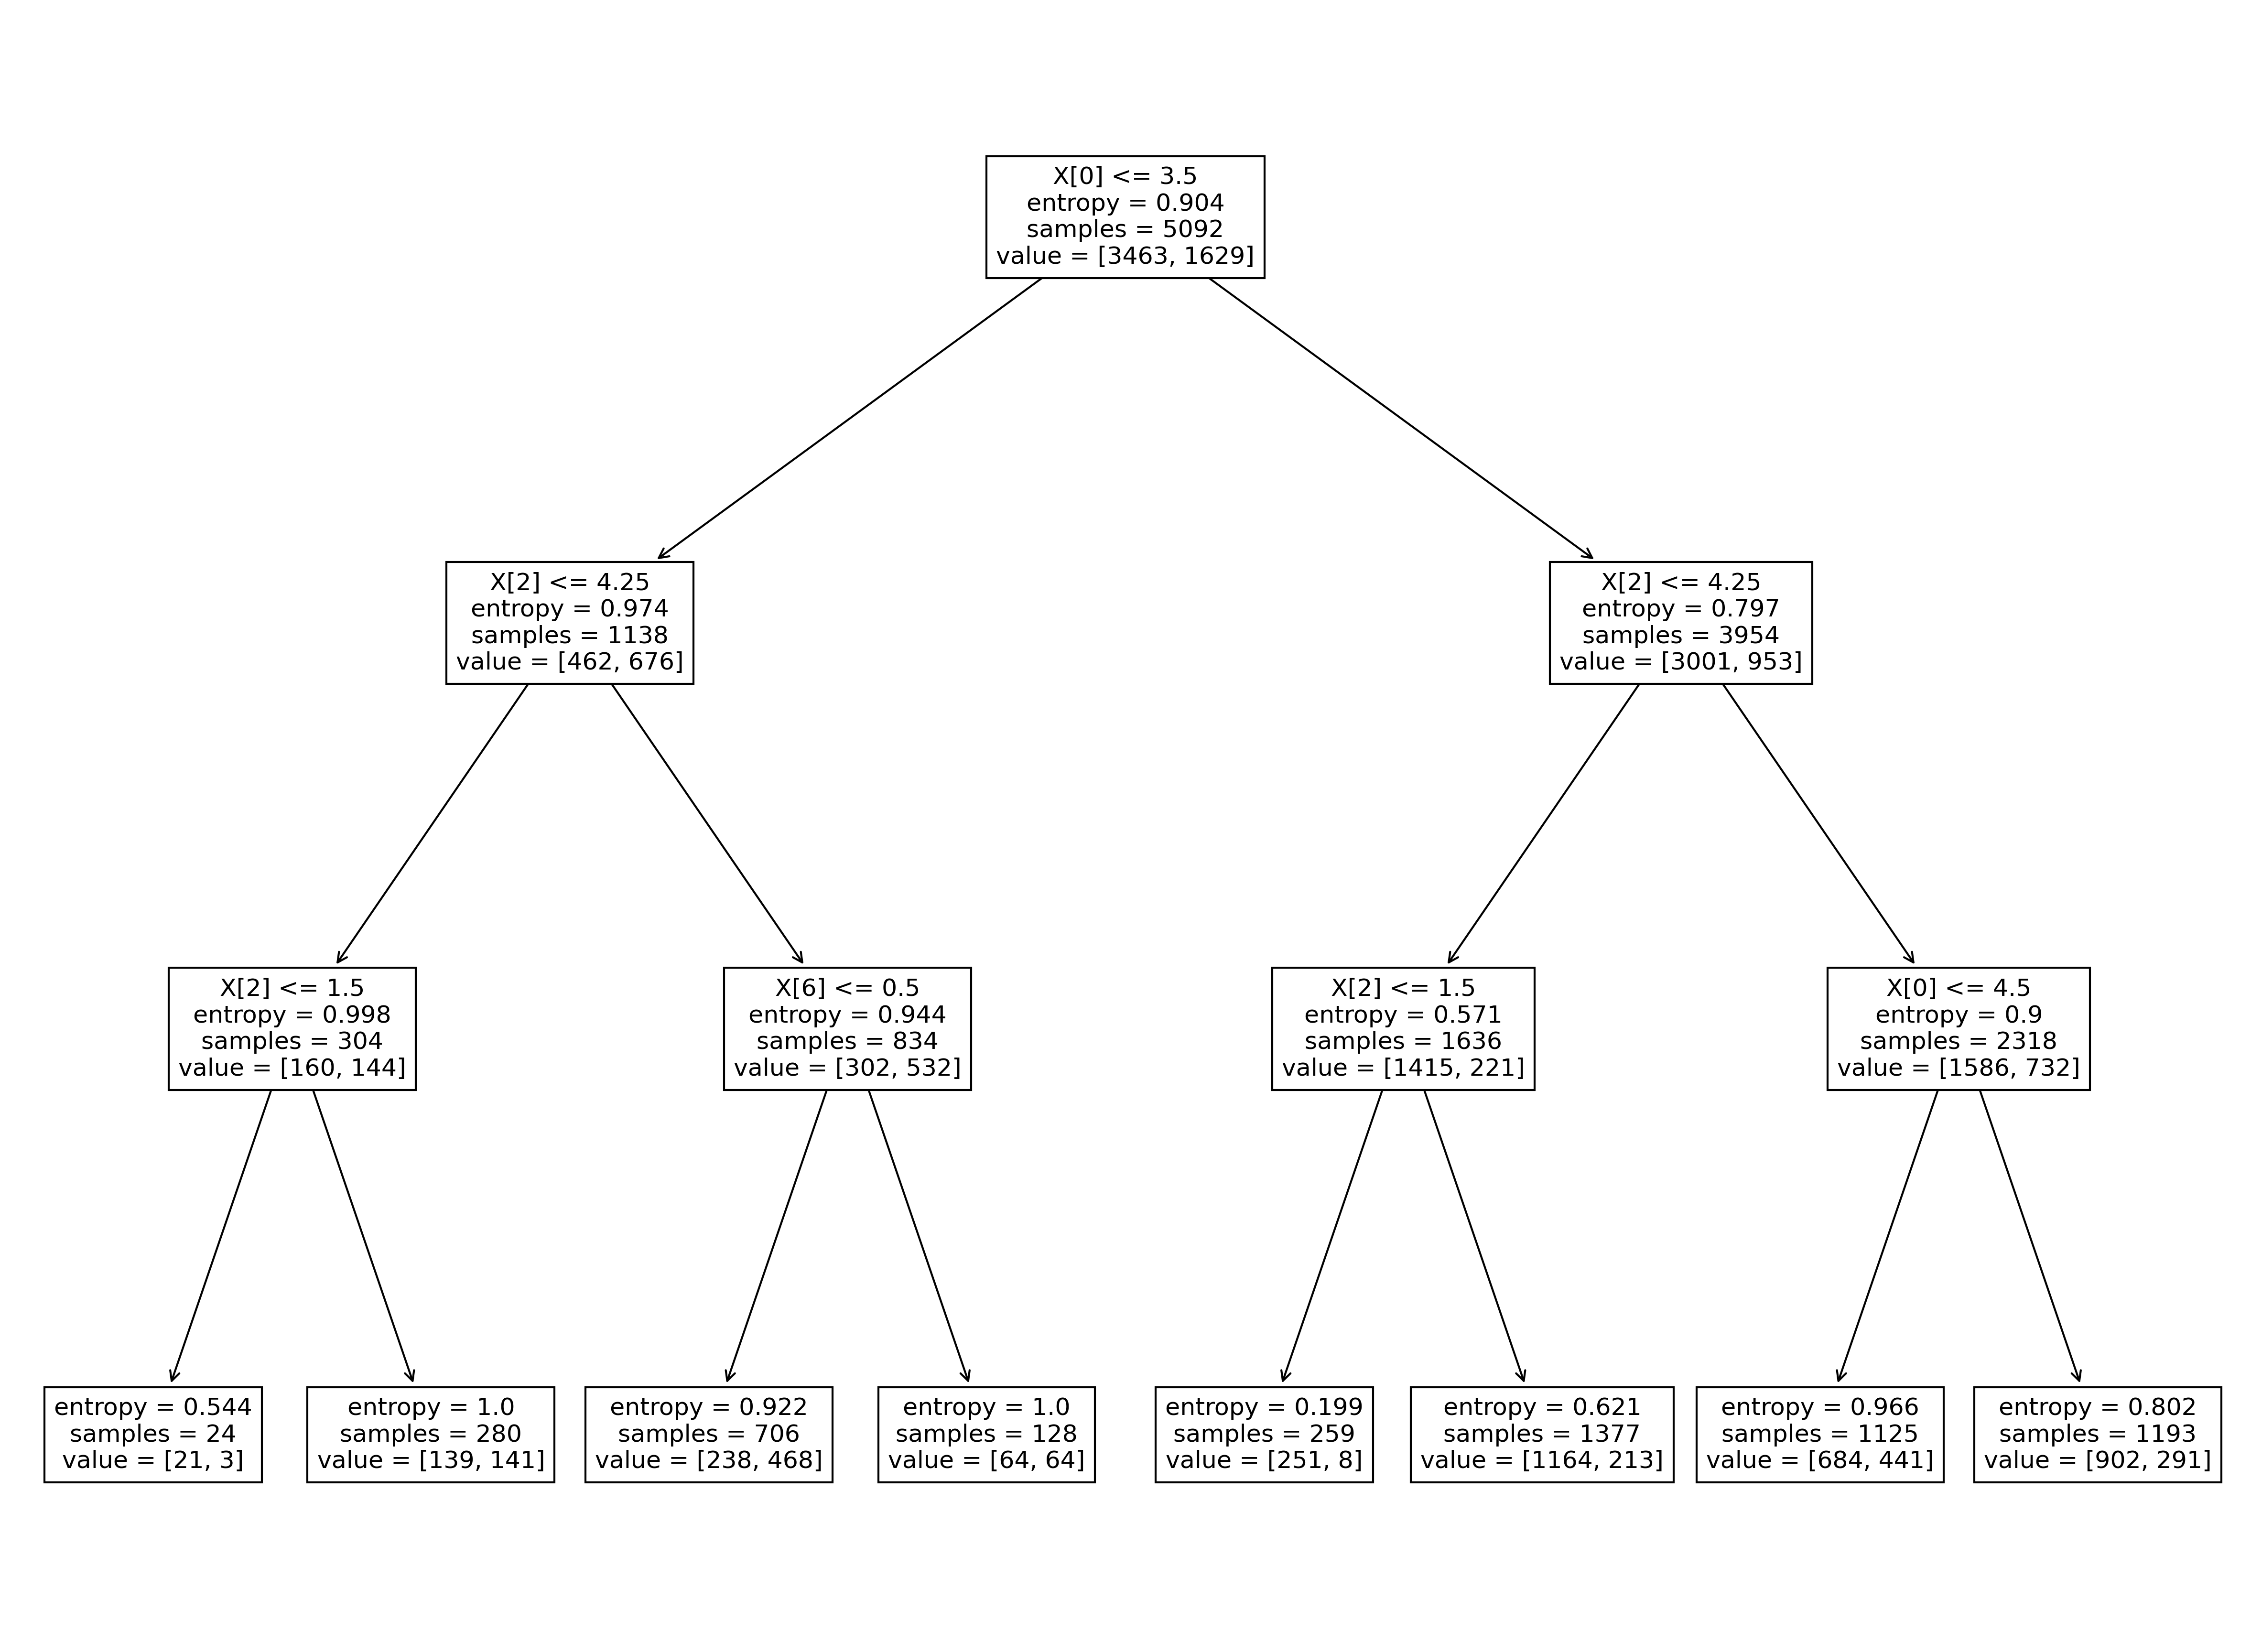

In [24]:
figure(figsize=(20, 15), dpi=300)
tree.plot_tree(model2)

In [ ]:
figure(figsize=(50,50), dpi=300)
tree.plot_tree(model3)

[Text(5812.5, 10192.5, 'X[0] <= 3.5\nentropy = 0.904\nsamples = 5092\nvalue = [3463, 1629]'),
 Text(2906.25, 7927.5, 'X[2] <= 4.25\nentropy = 0.974\nsamples = 1138\nvalue = [462, 676]'),
 Text(1453.125, 5662.5, 'X[2] <= 1.5\nentropy = 0.998\nsamples = 304\nvalue = [160, 144]'),
 Text(726.5625, 3397.5, 'X[4] <= 1.5\nentropy = 0.544\nsamples = 24\nvalue = [21, 3]'),
 Text(363.28125, 1132.5, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(1089.84375, 1132.5, 'entropy = 0.297\nsamples = 19\nvalue = [18, 1]'),
 Text(2179.6875, 3397.5, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 280\nvalue = [139, 141]'),
 Text(1816.40625, 1132.5, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(2542.96875, 1132.5, 'entropy = 0.999\nsamples = 270\nvalue = [139, 131]'),
 Text(4359.375, 5662.5, 'X[6] <= 0.5\nentropy = 0.944\nsamples = 834\nvalue = [302, 532]'),
 Text(3632.8125, 3397.5, 'X[0] <= 1.5\nentropy = 0.922\nsamples = 706\nvalue = [238, 468]'),
 Text(3269.53125, 1132.5, 'entropy = 0.551\nsample

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

Type your answer and code here

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

When comparing Question 5. Decision Tree and this Random Forest, we can observe that the Random Forest **does not have significant higher performance values**, for instance for this specific example the Random Forest f1-score 0 is 0.02 higher and 1 is 0.06 higher. Also the accuracy is ~0.0338 higher. Not a significant difference but worth mentioning.